<a href="https://colab.research.google.com/github/jyothi-sk/Unsupervised-ML/blob/main/Online_Retail_Customer_Segmentation_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Online Retail Customr Segmentation



##### **Project Type**    - Unsupervized ML
##### **Contribution**    - Individual
##### **Name**            - Jyothi S

# **Project Summary -**

Customer segmentation is the practice of dividing a company’s customers into groups that reflect similarity among customers in each group. The goal of segmenting customers is to decide how to relate to customers in each segment in order to maximize the value of each customer to the business

The project is about identifying major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

**Data Description:**

*   **InvoiceNo**: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
*   **StockCode**: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
*   **Description**: Product (item) name. Nominal.
*   **Quantity**: The quantities of each product (item) per transaction. Numeric.
*   **InvoiceDate**: Invice Date and time. Numeric, the day and time when each transaction was generated.
*   **UnitPrice**: Unit price. Numeric, Product price per unit in sterling.
*   **CustomerID**: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
*   **Country**: Country name. Nominal, the name of the country where each customer resides.

# **GitHub Link -**

# **Problem Statement**


To identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.

# **Let's Begin !**

**Importing Libraries**

In [ ]:
# importing numpy and pandas
import numpy as np
import pandas as pd

# Importing Visualization Libraries
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline

# Import Libraries
from numpy import math
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime, time
plt.rcParams.update({'figure.figsize':(8,6),'figure.dpi':100})

**Dataset Loading**

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Almabetter/Modules/Module4_ML/Unsupervised_ML_Capstone_Project/Online_Retail_Dataset.csv')

**Dataset First View**

In [ ]:
# Dataset First Look
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/11 12:50,4.95,12680.0,France


In [ ]:
# Dataset Rows & Columns count
print(f"Number of rows: {df.shape[0]}\nNumber of columns: {df.shape[1]}")

Number of rows: 541909
Number of columns: 8


In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


From above information we can observe that there are numerical and categorical features in this dataset. Features - 'Description' and 'CustomerID' are having few null values.

In [ ]:
# Dataset Columns
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

##**Data Wrangling**

In [ ]:
# converting customer id column to 'object' type
df['CustomerID'] = df['CustomerID'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB


In [ ]:
# Dataset Duplicate Value Count
df.duplicated().value_counts()

False    536641
True       5268
dtype: int64

In [ ]:
# Removing duplicate rows
df.drop_duplicates(inplace=True)

In [ ]:
# Missing Values/Null Values Count
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

<Figure size 1000x600 with 0 Axes>

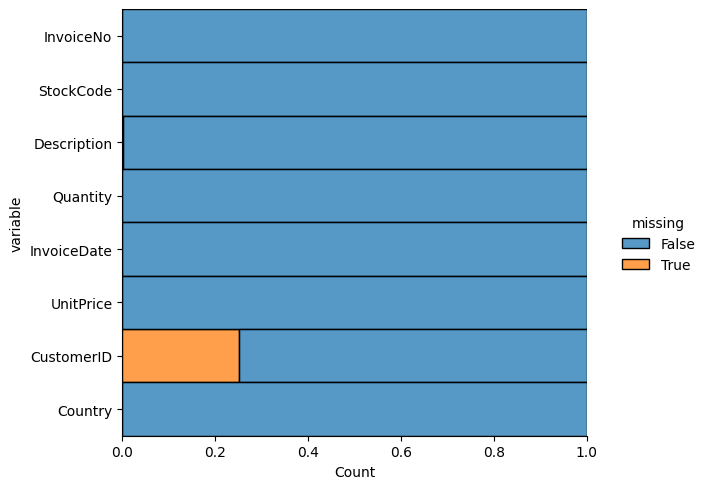

In [ ]:
# Visualizing the missing values

plt.figure(figsize=(10,6))
sns.displot(data=df.isna().melt(value_name="missing"), y="variable", hue="missing", multiple="fill", aspect=1.25);

**Observation**: We can see that 'Description' and 'CustomerID' features have
missing values.


In [ ]:
# Removing rows with missing values in 'CustomerID' and 'Description' columns
df = df.dropna(subset=['CustomerID', 'Description'])

# Verifying the removal of missing values
df.isnull().sum()


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

**Few Invoice numbers starts with letter 'C', which indicates cancelled invoice. We can drop the 'InvoiceNo' feature.**

In [ ]:
# Converting the column 'InvoiceNo' as string
df['InvoiceNo'] = df['InvoiceNo'].astype('str')


In [ ]:
# Lets check the InviceNo that starts with 'C'
df[df['InvoiceNo'].str.contains('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/10 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/10 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/10 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/11 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/11 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/11 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/11 11:58,1.25,17315.0,United Kingdom


In [ ]:
df = df[~df['InvoiceNo'].str.contains('C')]

In [ ]:
df.shape

(392732, 8)

**Converting 'InvoiceDate' column into 'year', 'month', 'day', 'hour', 'minute' and 'second'.**

In [ ]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format="%m/%d/%y %H:%M")

In [ ]:
df['InvoiceDate_year'] = df['InvoiceDate'].dt.year
df['InvoiceDate_month'] = df['InvoiceDate'].dt.month_name()
df['InvoiceDate_day'] = df['InvoiceDate'].dt.day_name()
df['InvoiceDate_hour'] = df['InvoiceDate'].dt.hour
df['InvoiceDate_minute'] = df['InvoiceDate'].dt.minute
df['InvoiceDate_second'] = df['InvoiceDate'].dt.second

In [ ]:
print(f"{df.dtypes} \n\n\n{df.shape}")

InvoiceNo                     object
StockCode                     object
Description                   object
Quantity                       int64
InvoiceDate           datetime64[ns]
UnitPrice                    float64
CustomerID                    object
Country                       object
InvoiceDate_year               int64
InvoiceDate_month             object
InvoiceDate_day               object
InvoiceDate_hour               int64
InvoiceDate_minute             int64
InvoiceDate_second             int64
dtype: object 


(392732, 14)


Adding a column for total_amount from quantity and unitprice columns:

In [ ]:
df['total_amount'] = df['Quantity']*df['UnitPrice']

**Manipulations done**:

Converted 'CustomerID' column to 'Object' type.

Dopped rows with missing values and duplicated values.

Changed InvoiceDate column to DateTime format.



In [ ]:
# Dataset description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,392732.0,13.153718,181.588420,1.0,2.00,6.00,12.00,80995.00
UnitPrice,392732.0,3.125596,22.240725,0.0,1.25,1.95,3.75,8142.75
InvoiceDate_year,392732.0,2010.934630,0.247178,2010.0,2011.00,2011.00,2011.00,2011.00
InvoiceDate_hour,392732.0,12.721579,2.276677,6.0,11.00,13.00,14.00,20.00
InvoiceDate_minute,392732.0,30.406244,17.081162,0.0,16.00,31.00,45.00,59.00
InvoiceDate_second,392732.0,0.000000,0.000000,0.0,0.00,0.00,0.00,0.00
total_amount,392732.0,22.629195,311.083465,0.0,4.95,12.39,19.80,168469.60


In [ ]:
df.describe(include='object').T

,count,unique,top,freq
InvoiceNo,392732,18536,576339,542
StockCode,392732,3665,85123A,2023
Description,392732,3877,WHITE HANGING HEART T-LIGHT HOLDER,2016
CustomerID,392732.0,4339.0,17841.0,7676.0
Country,392732,37,United Kingdom,349227
InvoiceDate_month,392732,12,November,63182
InvoiceDate_day,392732,6,Thursday,79260


**Description:**
*   We can see that 'Quantity' has negative minimum value.
*   'UnitPrice' features seems normally distributed as its mean value and 50%, to 75% values are eveny distributed but has 0 minimum value.
*   From CustomerID we can see that there are 4372 unique customers.

## **Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

In [ ]:
# Chart - 1 visualization code  - plot of dependent variable
customers_count=pd.DataFrame(df['CustomerID'].value_counts().sort_values(ascending=False).reset_index())
customers_count.rename(columns={'index':'CustomerID','CustomerID':'Count'},inplace=True)

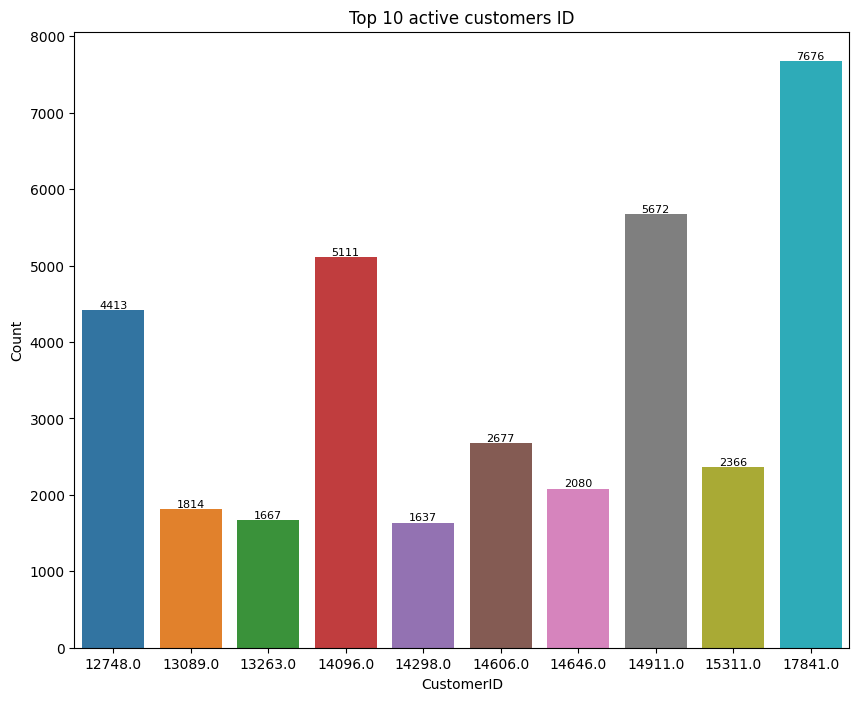

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Top 10 active customers ID')
ax = sns.barplot(x='CustomerID',y='Count',data=customers_count[:10])
ax.bar_label(ax.containers[0], fontsize=8);
plt.show()

**Chart used & Insights found**: Bar plot gives the count of each value of a feature. We can see the Top 10 customers count from the plot and ID 17841 is the top customer.

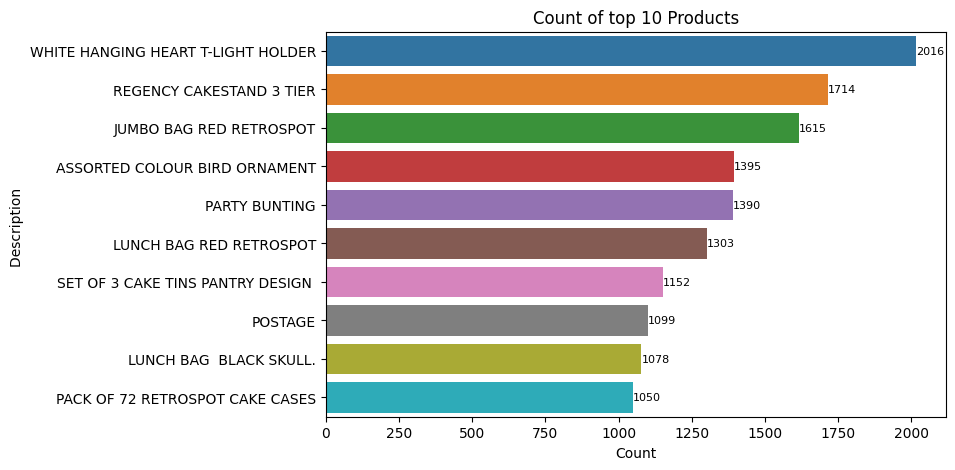

In [ ]:
# Chart - 2 bar chart for top 10 descriptions
Descriptions_sorted = df['Description'].value_counts().reset_index().rename(columns={"index":"Description ", 'Description':'Count'})

fig= plt.subplots(figsize = (8,5))
ax=sns.barplot(y='Description ',x='Count', data=Descriptions_sorted[:10])
plt.title("Count of top 10 Products")
ax.bar_label(ax.containers[0], fontsize=8);
plt.show()

**Insights:** 'WHITE HANGING HEART T-LIGHT HOLDER' is the highest selling product with count above 2000.

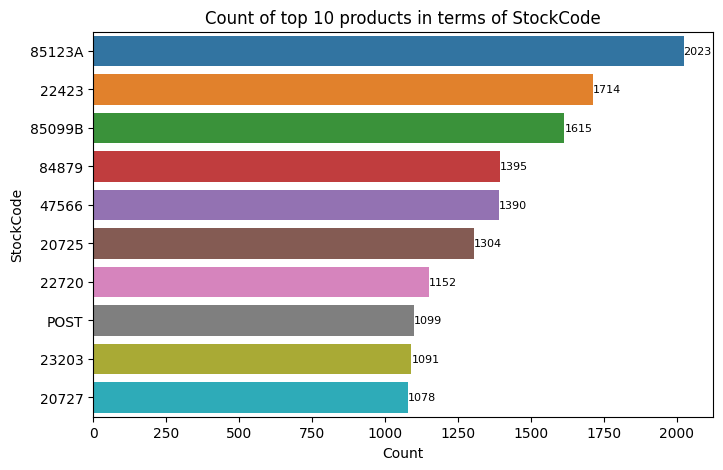

In [ ]:
# Chart - 3 visualization code  - histplot of
Descriptions_sorted = df['StockCode'].value_counts().reset_index().rename(columns={"index":"StockCode", 'StockCode':'Count'})

fig= plt.subplots(figsize = (8,5))
ax=sns.barplot(data = Descriptions_sorted[:10], y = 'StockCode', x = 'Count')
plt.title("Count of top 10 products in terms of StockCode")
ax.bar_label(ax.containers[0], fontsize=8);
plt.show()

**Insights**: StockCode 85123A is the highest selling product.

In [ ]:
# Chart - 4 Top 10 countries who bought maximum products
Top_country = df['Country'].value_counts().reset_index()
Top_country.rename(columns={'index': 'Country_Name','Country': 'Count'}, inplace=True)
Top_country[:10]


,Country_Name,Count
0,United Kingdom,349227
1,Germany,9027
2,France,8327
3,EIRE,7228
4,Spain,2480
5,Netherlands,2363
6,Belgium,2031
7,Switzerland,1842
8,Portugal,1453
9,Australia,1184


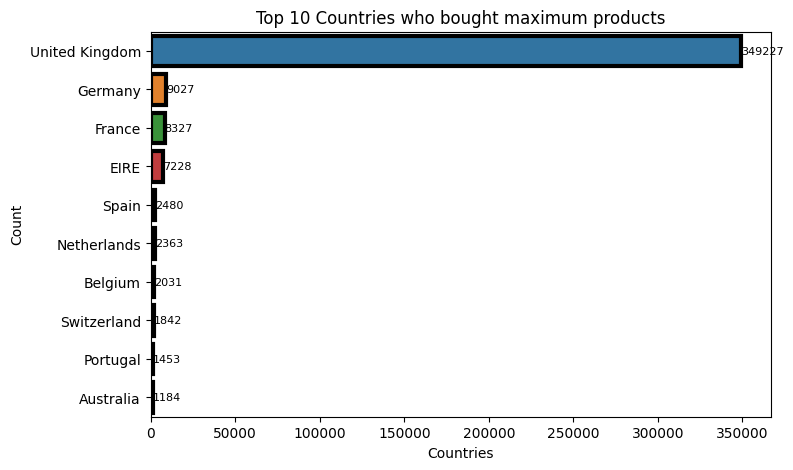

In [ ]:
# Barplot of Top 10 countries who's buying maximum products
plt.figure(figsize=(8,5))
ax=sns.barplot(x='Count', y='Country_Name', data=Top_country[:10], edgecolor = 'black', lw =3)
plt.title('Top 10 Countries who bought maximum products')
plt.xlabel('Countries')
plt.ylabel('Count')
ax.bar_label(ax.containers[0], fontsize=8);
plt.show()

**Insights**: From the plots we can see that most of the customers are from United Kingdom.

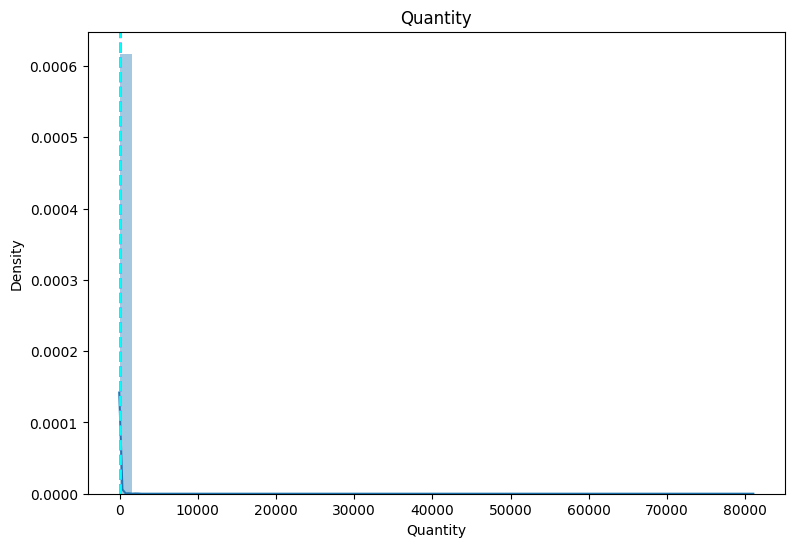

Skewness : 400.8117144489054
Kurtosis : 171772.12450262278


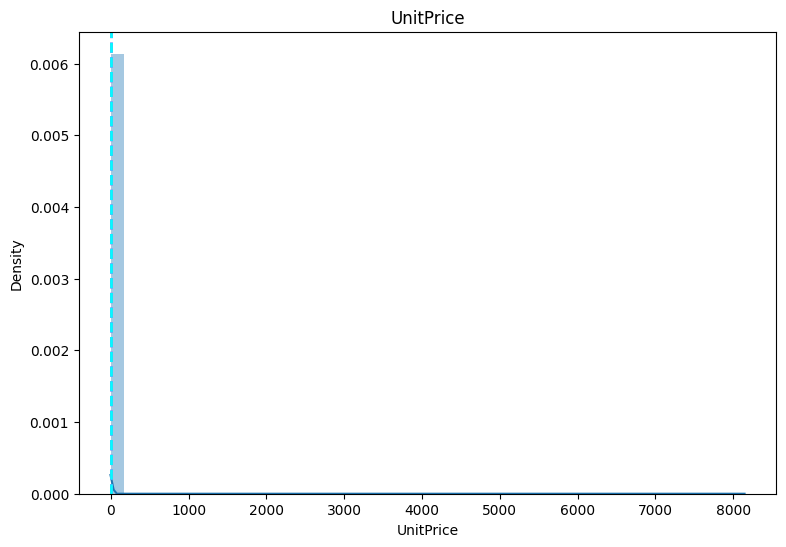

Skewness : 202.75061725718567
Kurtosis : 57403.96255594054


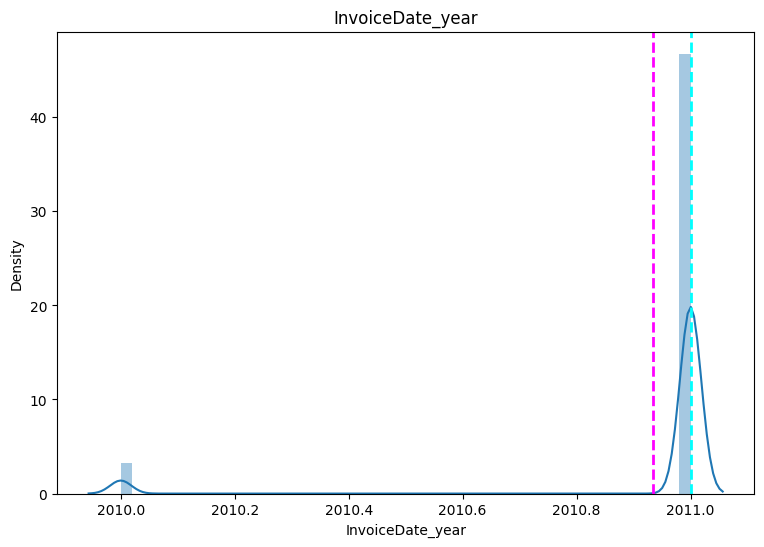

Skewness : -3.5167469285537045
Kurtosis : 10.367561756595565


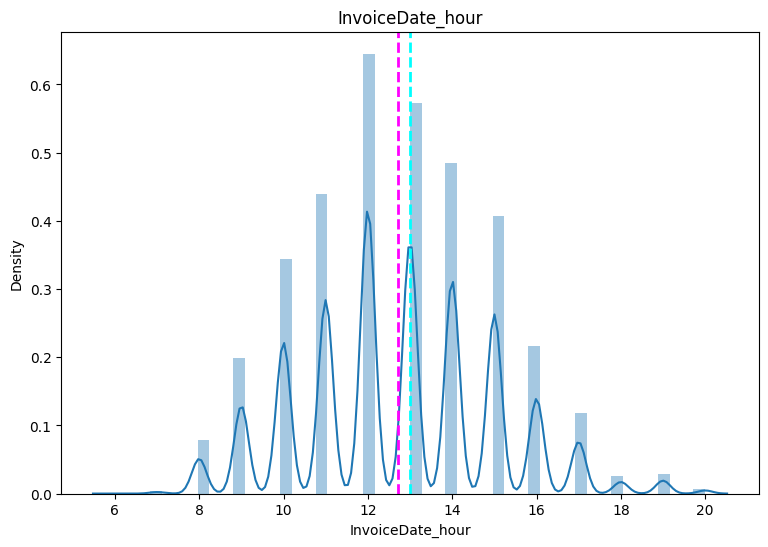

Skewness : 0.18708090962435506
Kurtosis : -0.22002250912534427


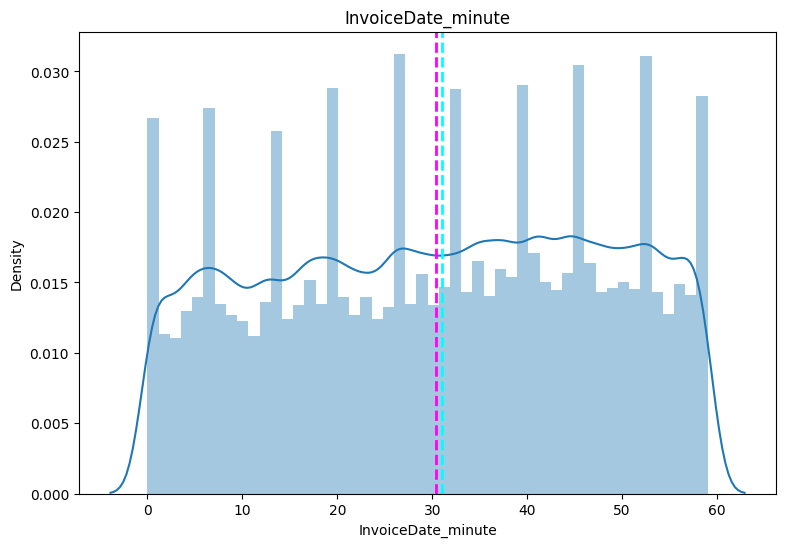

Skewness : -0.08049184573623291
Kurtosis : -1.1661140967814052


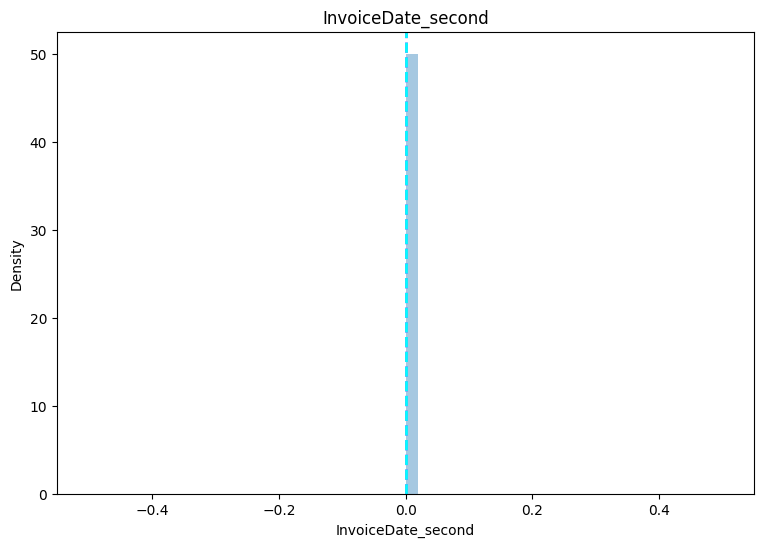

Skewness : 0
Kurtosis : 0


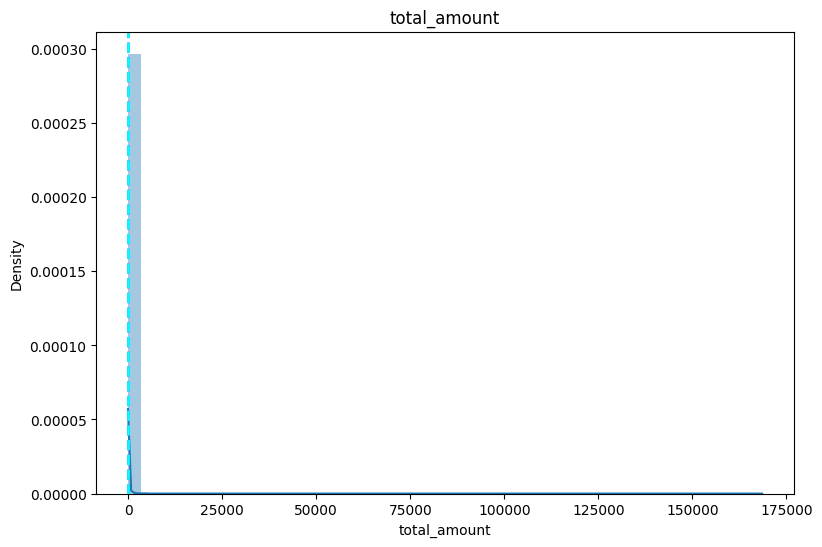

Skewness : 448.5442811269849
Kurtosis : 229171.9647792387


In [ ]:
# Chart - 5 Distribution of numerical features

numerical_features = df.describe(include='number').columns

for col in numerical_features:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (df[col])
  sns.distplot(df[col])
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
  plt.show()
  print( "Skewness :",df[col].skew())
  print( "Kurtosis :",df[col].kurt())

**Insights**: From the above plot we can understand that the feature is highly right skewed.

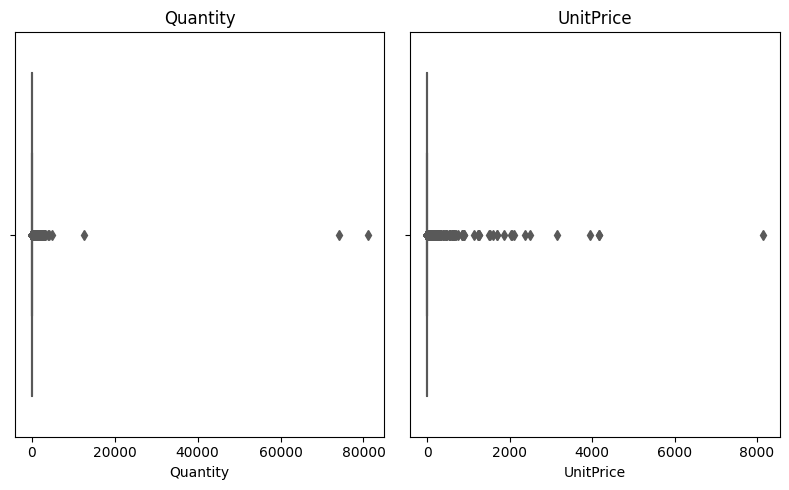

In [ ]:
# Chart - 6 visualization code - boxplots for numerical features
fig, ax= plt.subplots(nrows=1, ncols=2, figsize = (8,5))
ax=ax.flatten()
sns.boxplot(data = df, x = df['Quantity'], ax=ax[0], palette = 'Set2')
sns.boxplot(data = df, x = df['UnitPrice'], ax=ax[1], palette = 'Set2')
#[fig.delaxes(ax) for ax in ax.flatten() if not ax.has_data()]
ax[0].title.set_text("Quantity")
ax[1].title.set_text("UnitPrice")
plt.tight_layout()
plt.show()


**Plot used**: The boxplot is ideal for understanding the presence of outliers in the features.

**Insights found**:From the above plot we can observe that there are outliers in both 'Quantity' and 'UnitPrice' columns.

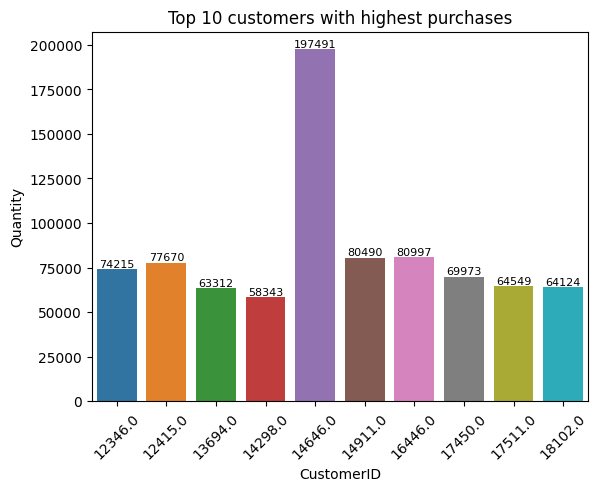

In [ ]:
# Chart - 7 Top ten customers who has ordered maximum quantity.

Top_10=df.groupby(['CustomerID'])['Quantity'].sum().reset_index().sort_values(by="Quantity" ,ascending=False ).head(10)
# create a bar plot
ax=sns.barplot(x='CustomerID', y='Quantity', data=Top_10)
plt.title('Top 10 customers with highest purchases')
ax.bar_label(ax.containers[0], fontsize=8);
ax.tick_params(axis='x', labelrotation = 45)
plt.show()

**Plot used:** The bar plot is good for bivariate comparison.

**Insights found:** From above plot we understand that customer 14646.0 has purhased the highest quantity.

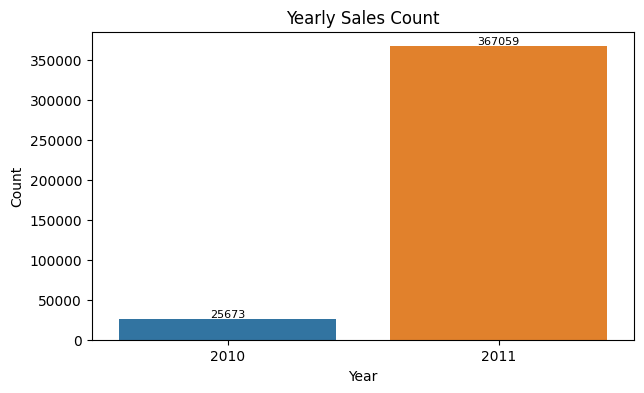

In [ ]:
# Chart - 8 Sales count w.r.t. every year
years_count = df['InvoiceDate_year'].value_counts().reset_index().rename(columns={'index': 'Year', 'InvoiceDate_year': 'Count'})

fig= plt.figure(figsize = (7,4))
ax = sns.barplot(x='Year', y='Count',data=years_count)
plt.title('Yearly Sales Count')
ax.bar_label(ax.containers[0], fontsize=8);
plt.show()

**Insights found:** The above chart indicates that most of customers both in 2011 compared to 2010.

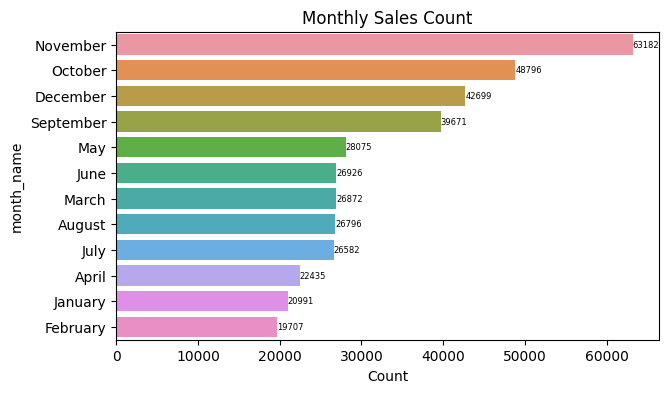

In [ ]:
# Chart - 9 sales count w.r.t. every month
months_count = df['InvoiceDate_month'].value_counts().reset_index().rename(columns={'index': 'month_name', 'InvoiceDate_month': 'Count'})

fig= plt.figure(figsize = (7,4))
ax = sns.barplot(y='month_name', x='Count',data=months_count)
plt.title('Monthly Sales Count')
ax.bar_label(ax.containers[0], fontsize=6);
plt.show()

**Insights found:** We can see that the sales is highest in november, october and december, it might be due to festival season, and sales is least in February, maybe due to end of financial year.

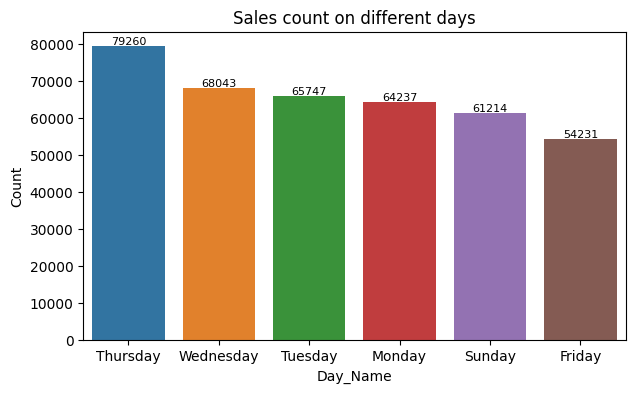

In [ ]:
# Chart - 10 sale of the pruducts w.r.t days of the week.
days_count = df['InvoiceDate_day'].value_counts().reset_index().rename(columns={'index': 'Day_Name', 'InvoiceDate_day': 'Count'})

fig= plt.figure(figsize = (7,4))
ax = sns.barplot(x='Day_Name',y='Count',data=days_count)
plt.title('Sales count on different days')
ax.bar_label(ax.containers[0], fontsize=8);
plt.show()

**Insights found:** We can see that the sales are higher on Thursdays and least on Fridays. There are no sales on saturdays, that could be due to no data of saturdays or no purchase done on saturdays for some reason.

In [ ]:
# Chart - 11 sales count w.r.t. time of the day

#unique values of hour feature
df['InvoiceDate_hour'].unique()


array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17,  7, 18, 19, 20,  6])

In [ ]:
def time_sort(time):
  if time in [6,7,8,9,10,11]:
    return 'Morning'
  elif time in [12, 13, 14, 15, 16]:
    return 'Afternoon'
  else:
    return 'Evening'

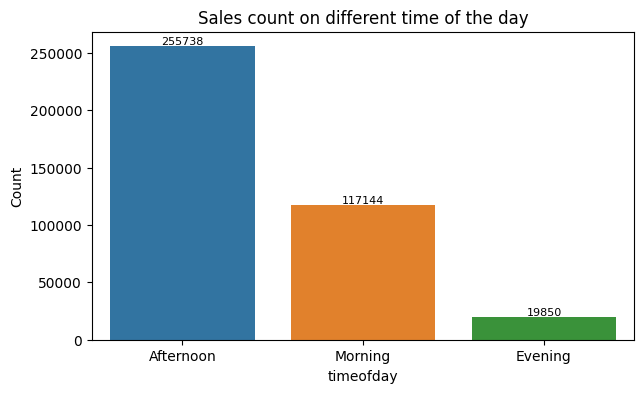

In [ ]:
df['time_of_day'] = df['InvoiceDate_hour'].apply(time_sort)
timeofday_count = df['time_of_day'].value_counts().reset_index().rename(columns={'index': 'timeofday', 'time_of_day': 'Count'})

fig= plt.figure(figsize = (7,4))
ax = sns.barplot(x='timeofday',y='Count',data=timeofday_count)
plt.title('Sales count on different time of the day')
ax.bar_label(ax.containers[0], fontsize=8);
plt.show()

**Insights:** From the above chart we can see that highest sales count is in the afternoon and least in the evening time.

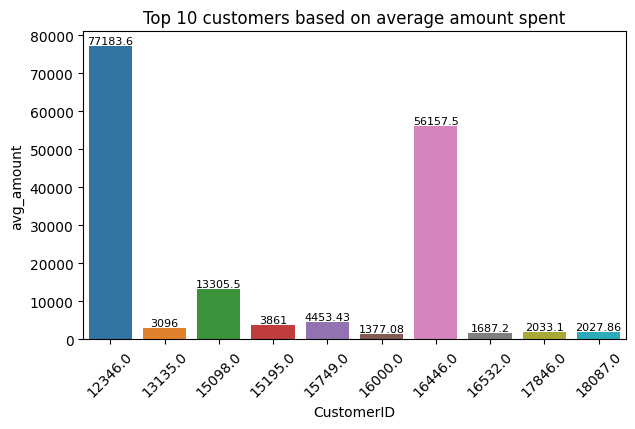

In [ ]:
# Chart - 12
Avg_amount = df.groupby('CustomerID')['total_amount'].mean().reset_index().rename(columns={'total_amount':'avg_amount'}).sort_values(by = ['avg_amount'], ascending=False)
fig= plt.figure(figsize = (7,4))
ax = sns.barplot(x=Avg_amount['CustomerID'].head(10), y=Avg_amount['avg_amount'].head(10),data=Avg_amount.head(10))
plt.title('Top 10 customers based on average amount spent')
ax.bar_label(ax.containers[0], fontsize=8);
ax.tick_params(axis='x', labelrotation = 45)
plt.show()

**Insights:** From the chart, we can see that the **highest average amount** spent is 77183.6/- by the **customer 12346.0** and 2nd highest is 56157.5/- by **customer 16446.0**.

In [ ]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'InvoiceDate_year',
       'InvoiceDate_month', 'InvoiceDate_day', 'InvoiceDate_hour',
       'InvoiceDate_minute', 'InvoiceDate_second', 'total_amount',
       'time_of_day'],
      dtype='object')

<Axes: >

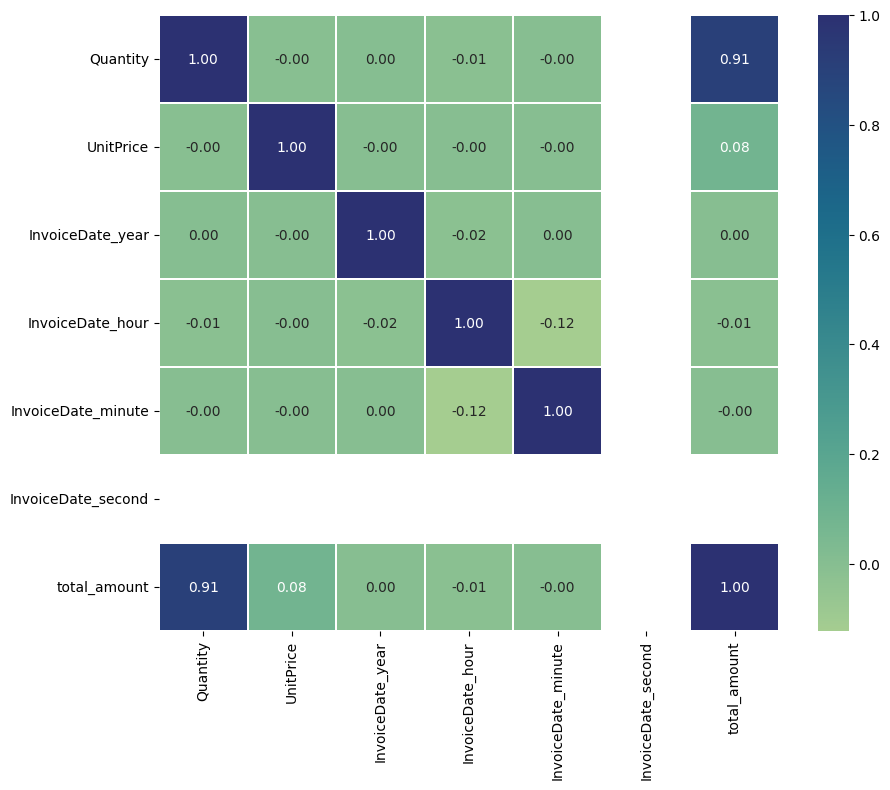

In [ ]:
#Chart - 13 - Correlation Heatmap
# Correlation Heatmap visualization code
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot = True, fmt=".2f", cmap='crest', linewidths=0.1)

**Insights found:** From the plot, Total_amount and Quantity are highly correlated which is obvious.